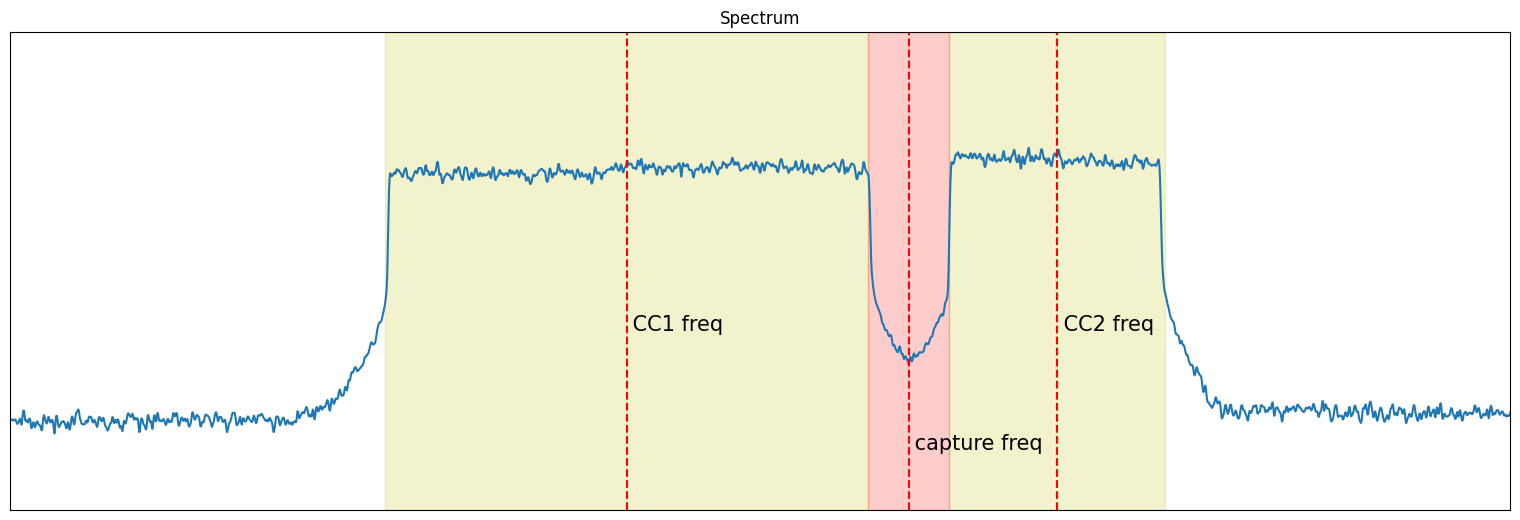

In [1]:
'''
Author: Kevin Yuan
Date: 2023-02-15 16:09:20
LastEditTime: 2023-02-15 16:26:18
LastEditors: Kevin Yuan
Description: 
FilePath: \999_Script\temp.py
'''


from matplotlib import pyplot

raw_data = []

with open("spec.txt", "r") as f:
    raw_data = f.readlines()

spec_str = raw_data[0][:-1].split(",")
freq_str = raw_data[1][:-1].split(",")

plot_num = len(spec_str)
spec_dic = {}
for i in range(plot_num):
    cur_freq = float(freq_str[i]) / 1e6
    cur_spec = float(spec_str[i])
    if abs(cur_freq) > 40: continue
    spec_dic[cur_freq] = cur_spec

spec_dic_new = {}

for i in spec_dic:
    if i == 0: spec_dic_new[i] = spec_dic[i]
    elif i <= -15: spec_dic_new[i+10] = spec_dic[i]
    elif -15 < i < -5: continue
    elif -5 <= i < 2.5: spec_dic_new[i] = spec_dic[i]
    elif 2.5 < i < 12.5: continue
    elif 12.5 <= i: spec_dic_new[i-10] = spec_dic[i]


freq = []
for i in spec_dic_new:
    if abs(i) > 15: continue
    freq.append(i)
spec = [spec_dic_new[x] for x in freq]

title = "Spectrum"

fig, ax_loss = pyplot.subplots(figsize=(15,5))

y_min, y_max = -80, 0
ax_loss.set_xlim(-15, 10)
ax_loss.set_ylim(y_min, y_max)
ax_loss.set_xlabel("Frequency [MHz]", fontsize=20)
ax_loss.set_ylabel("loss [dBm]", fontsize=20)

ax_loss.plot(freq, spec)

fill_range_cc1 = [-8.75,-0.7]
fill_range_cc2 = [0.65,4.25]
fill_range_gap = [-0.7, 0.65]
freq_cc1 = sum(fill_range_cc1)/len(fill_range_cc1)
freq_cc2 = sum(fill_range_cc2)/len(fill_range_cc2)
freq_gap = sum(fill_range_gap)/len(fill_range_gap)

pyplot.fill_between(fill_range_cc1, y1=y_min, y2=y_max, color='y', alpha=0.2)
pyplot.fill_between(fill_range_cc2, y1=y_min, y2=y_max, color='y', alpha=0.2)
pyplot.fill_between(fill_range_gap, y1=y_min, y2=y_max, color='r', alpha=0.2)

# fig.legend(loc=(0.05, 0.75), fontsize="xx-large")
ax_loss.get_xaxis().set_visible(False)
ax_loss.get_yaxis().set_visible(False)

ax_loss.axvline(x=freq_cc1, c="r", ls="--")
ax_loss.axvline(x=freq_cc2, c="r", ls="--")
ax_loss.axvline(x=freq_gap, c="r", ls="--")

ax_loss.text(freq_cc1, -50, " CC1 freq", fontsize=15)
ax_loss.text(freq_cc2, -50, " CC2 freq", fontsize=15)
ax_loss.text(freq_gap, -70, " capture freq", fontsize=15)

pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=15)
pyplot.title(title)
pyplot.grid(True)
pyplot.tight_layout(pad=0)
pyplot.show()

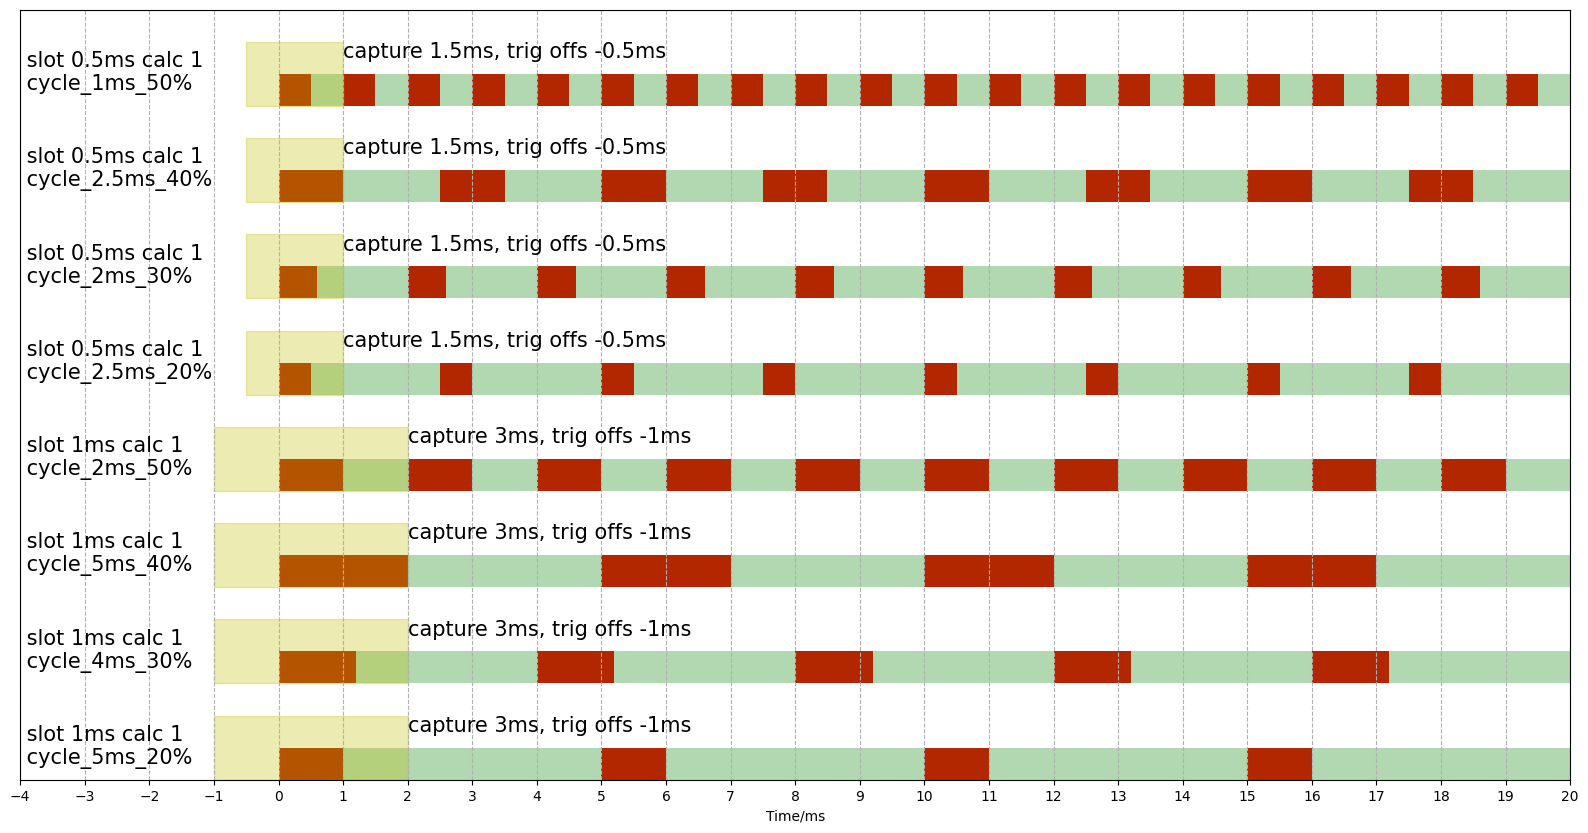

In [3]:
# plot NR signal structure

import math
from matplotlib import pyplot as plt
from matplotlib import patches



duty_cycle_case_dic = {
    1: {
        20: 5,
        30: 4,
        40: 5,
        50: 2,
    },
    0.5: {
        20: 2.5,
        30: 2,
        40: 2.5,
        50: 1,
    }
}

y_min = 0
y_max = 8 * 3
x_start = -4
height = 1

slot_num_calc = 1
segment_length_ms = 20

plt.rcParams['figure.figsize'] = (20, 10)
plt.axes().get_yaxis().set_visible(False)

plt.ylim(y_min, y_max)
plt.xlim(x_start, segment_length_ms)
plt.xlabel("Time/ms")
plt.locator_params("x", nbins=(segment_length_ms - x_start))

y_level = 0
for u in duty_cycle_case_dic:

    slot_duration_ms = u

    for pct in duty_cycle_case_dic[u]:

        cycle_length_ms = duty_cycle_case_dic[u][pct]
        valid_signal = 0.01 * pct * cycle_length_ms
        slot_per_cycle = int( valid_signal / slot_duration_ms)

        trigger_offset_ms = -slot_duration_ms
        capture_length_ms = 0
        # capture_length_ms += ( math.floor(slot_num_calc/slot_per_cycle) - 1 ) * cycle_length_ms
        # capture_length_ms += ( slot_num_calc - math.floor(slot_num_calc/slot_per_cycle) * slot_per_cycle) * slot_duration_ms
        # capture_length_ms += 2 * slot_duration_ms

        capture_length_ms += math.floor((slot_num_calc - 1)/slot_per_cycle) * cycle_length_ms
        capture_length_ms += (slot_num_calc - math.floor((slot_num_calc -1 )/slot_per_cycle) * slot_per_cycle) * slot_duration_ms
        capture_length_ms += 2 * slot_duration_ms

        # plot DUT signal
        cycle_start = 0
        while cycle_start < segment_length_ms:
            slot = patches.Rectangle((cycle_start, y_level), width=valid_signal, height=height, facecolor="r")
            cycle = patches.Rectangle((cycle_start, y_level), width=cycle_length_ms, height=height, alpha=0.3, facecolor="g")
            
            plt.gca().add_patch(slot)
            plt.gca().add_patch(cycle)
            cycle_start += cycle_length_ms

        capture_range = [trigger_offset_ms, trigger_offset_ms + capture_length_ms]

        plt.text(x_start, y_level + 0.5, f" slot {slot_duration_ms}ms calc {slot_num_calc}\n cycle_{cycle_length_ms}ms_{pct}%", fontsize=15)
        plt.text(trigger_offset_ms + capture_length_ms, y_level + 1.5, f"capture {capture_length_ms}ms, trig offs {trigger_offset_ms}ms", fontsize=15)
        plt.fill_between(capture_range, y1=y_level, y2=y_level + 2, color='y', alpha=0.3)

        y_level += 3


plt.grid(True, linestyle="--")

plt.show()

In [5]:
import os
import pandas as pd

osl_cal_file = "C:\\Users\\kyuan\\Downloads\\iq151ed0030x osl.pkl"
osl_cal_file_xlsx = osl_cal_file.replace(".pkl", ".xlsx")
if not os.path.exists(osl_cal_file) and os.path.exists(osl_cal_file_xlsx):
    temp = pd.DataFrame(pd.read_excel(osl_cal_file_xlsx))
    temp.to_pickle(osl_cal_file)

osl_cal_data = pd.read_pickle(osl_cal_file)

osl_cal_data.head(5)

,Date,Time,SerialNum,AssyHWRev,TestSWRev,ConfigFileName,Operator,TestType,StationID,TestNum,...,SetUnit46,SetName47,SetValue47,SetUnit47,SetName48,SetValue48,SetUnit48,SetName49,SetValue49,SetUnit49
0,2021-08-05,21:30:34,IQ151ED0030X,C.5.0.4,v1.2.3,1055-XTMM-C07.cfg,AA,IQXFactoryEfficiency-AA02,FLEXOSLTEST01,1020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-05,21:30:34,IQ151ED0030X,C.5.0.4,v1.2.3,1055-XTMM-C07.cfg,AA,IQXFactoryEfficiency-AA02,FLEXOSLTEST01,1020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-05,21:30:34,IQ151ED0030X,C.5.0.4,v1.2.3,1055-XTMM-C07.cfg,AA,IQXFactoryEfficiency-AA02,FLEXOSLTEST01,1010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-05,21:30:34,IQ151ED0030X,C.5.0.4,v1.2.3,1055-XTMM-C07.cfg,AA,IQXFactoryEfficiency-AA02,FLEXOSLTEST01,1050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-05,21:30:34,IQ151ED0030X,C.5.0.4,v1.2.3,1055-XTMM-C07.cfg,AA,IQXFactoryEfficiency-AA02,FLEXOSLTEST01,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


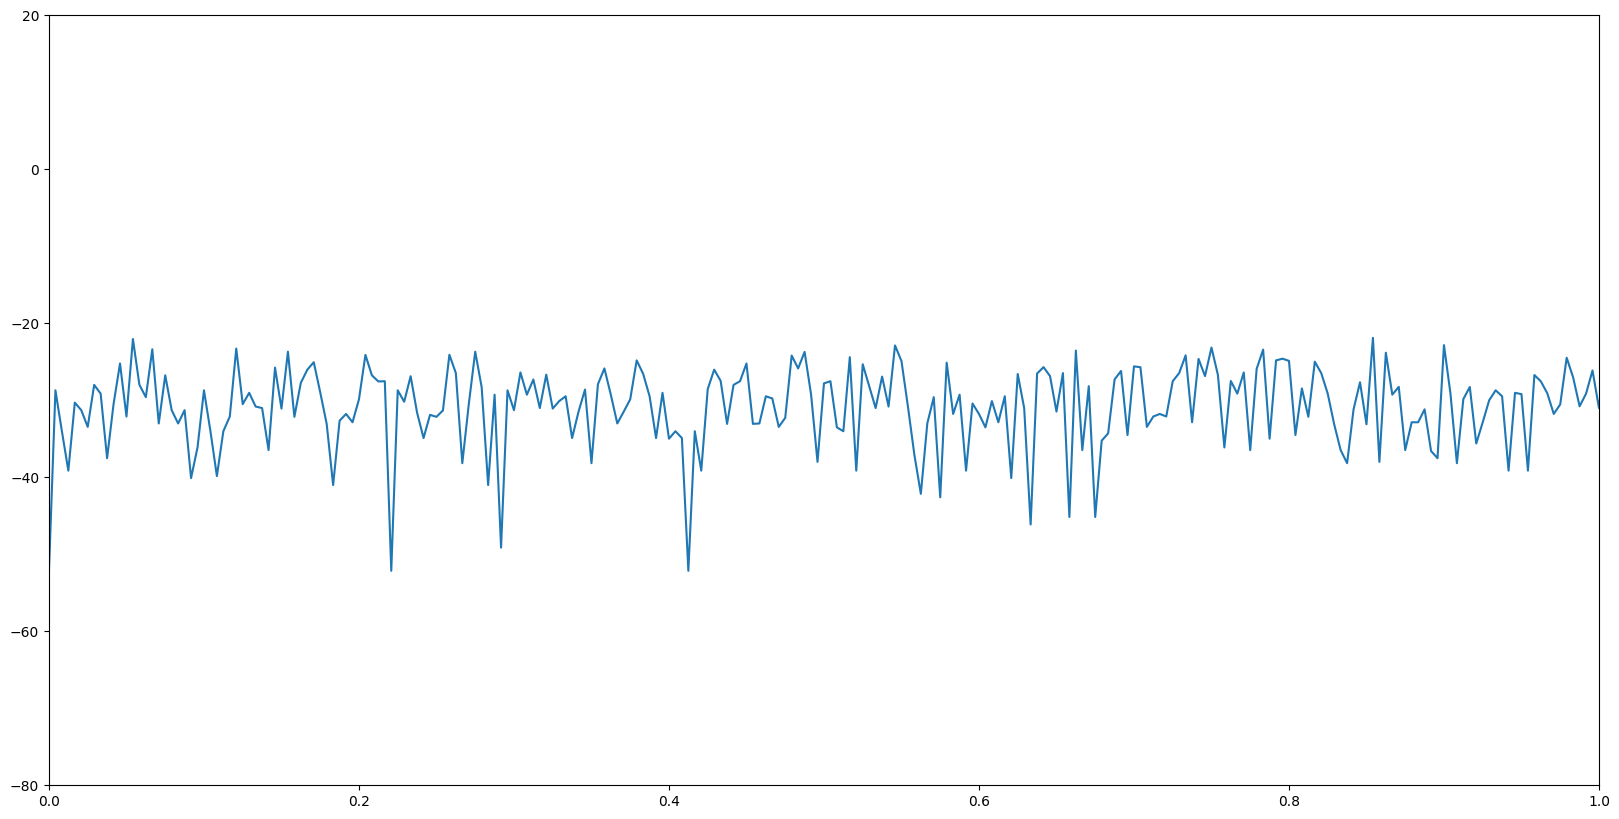

: 

In [57]:
import pickle
from matplotlib import pyplot as plt

pvt_data = []

with open("20221019_DutyCycle_40_pvt.pkl", "rb") as f:
    pvt_data = pickle.load(f)

pvt_dic = {}
count = len(pvt_data)

time_range = 1

i = 0
while i / count < time_range / 1000:
    t = i / count * 20e3 # us
    pvt_dic[t] = pvt_data[i]
    i += 1


plt.rcParams['figure.figsize'] = (20, 10)
plt.xlim(0, time_range)
plt.ylim(-80, 20)

plt.plot([x for x in pvt_dic], [pvt_dic[x] for x in pvt_dic])
plt.show()